## Programming Assignment 2
### GROUP ASSIGNMENT: You can solve this in groups of up to 4 students (2, 3, or 4 students).

### Students' names :

* SHREYA BALASUBRAMANYA RAJU [GitHub -- LINK](https://github.com/shreyar007/INF502)
* SARAYU KONATHAM [GitHub -- LINK](https://github.com/sarayukonatham2008/INF502)
* SAI TEJA BANDAMIDI [GitHub -- LINK](https://github.com/Tejabandamidi/INF502)
* THARUN THEERUPALLY [GitHub -- LINK](https://github.com/tharunrede/INF502)
---

				----- MAIN MENU -----
		The list of options to choose from is as follows: 
		1. Request the system to collect data for a specific repository
		2. List all repos collected
		3. List all pull requests from a specific repo
		4. List the summary of a repo
		5. Plot the data for a specific repo
		6. Plot the data about pull requests from ALL repos
		7. Calculate the correlation between the data collected for the users
		8. Calculate the correlation between all the numeric data in the pull requests for a repo
		9. Exit
Enter your choice: 1
--- Enter GitHub details ---
Provide the owner name: HouariZegai
Provide the repo name: Calculator

----- Gathering the repo data -----
----- Gathering the pull request data -----
----- Gathering the user data -----

				----- MAIN MENU -----
		The list of options to choose from is as follows: 
		1. Request the system to collect data for a specific repository
		2. List all repos collected
		3. List all pull requests from a specific repo
		4. List the s

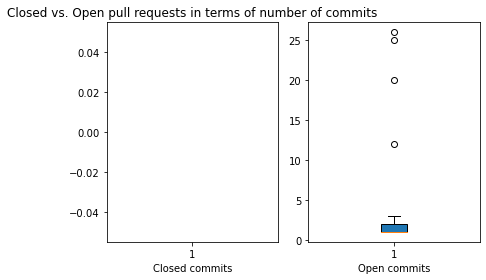

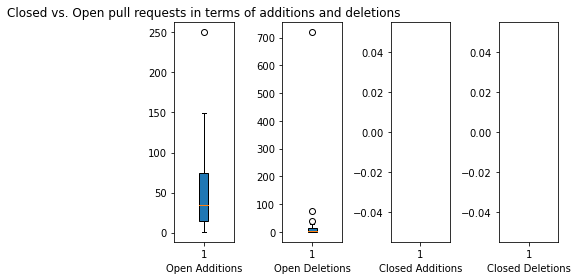

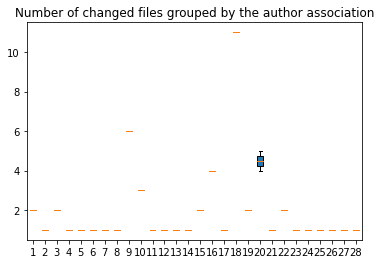

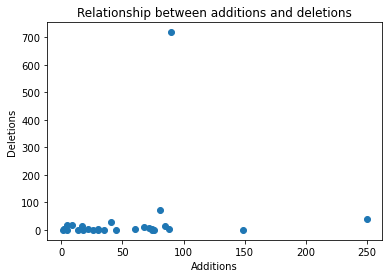


				----- MAIN MENU -----
		The list of options to choose from is as follows: 
		1. Request the system to collect data for a specific repository
		2. List all repos collected
		3. List all pull requests from a specific repo
		4. List the summary of a repo
		5. Plot the data for a specific repo
		6. Plot the data about pull requests from ALL repos
		7. Calculate the correlation between the data collected for the users
		8. Calculate the correlation between all the numeric data in the pull requests for a repo
		9. Exit
Enter your choice: 1
--- Enter GitHub details ---
Provide the owner name: chavesana
Provide the repo name: INF502-Fall22

----- Gathering the repo data -----
----- Gathering the pull request data -----
----- Gathering the user data -----

				----- MAIN MENU -----
		The list of options to choose from is as follows: 
		1. Request the system to collect data for a specific repository
		2. List all repos collected
		3. List all pull requests from a specific repo
		4. List the

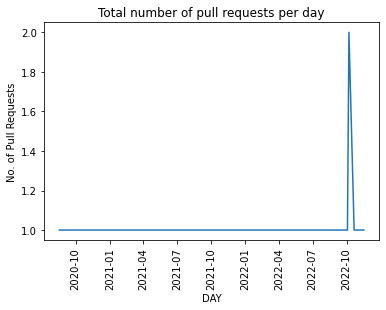

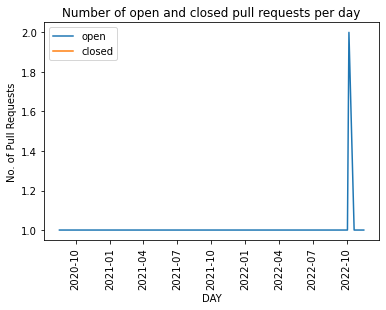

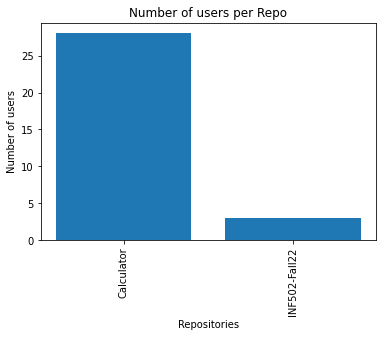


				----- MAIN MENU -----
		The list of options to choose from is as follows: 
		1. Request the system to collect data for a specific repository
		2. List all repos collected
		3. List all pull requests from a specific repo
		4. List the summary of a repo
		5. Plot the data for a specific repo
		6. Plot the data about pull requests from ALL repos
		7. Calculate the correlation between the data collected for the users
		8. Calculate the correlation between all the numeric data in the pull requests for a repo
		9. Exit
Enter your choice: 7
----- The correlation between the data collected for the users is as follows -----
               followers  following  contributions     pulls  repositories
followers            NaN        NaN            NaN       NaN           NaN
following            NaN        NaN            NaN       NaN           NaN
contributions        NaN        NaN       1.000000 -0.042904      0.556826
pulls                NaN        NaN      -0.042904  1.000000      0.0124

In [1]:
#*******************
#*******************
#              INF502-- PROGRAMMING ASSIGNMENT 2
#@sb3292
#@sk2482
#@sb3368
#@tt686
#*******************
#*******************

import requests
import json
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import parser
from datetime import date
from bs4 import BeautifulSoup as bs
import traceback
import logging
import unittest


# class that deeines the author data
class Authors:
    try:
        def __init__(self, user):
            self.user = user
            self.total_pull_req = 1
            self.total_foll = 0
            self.total_following = 0
            self.total_contri = 0
            self.total_repo = 0

            # getting the author data from the gihub page
            resp_session = requests.get("https://github.com/{}".format(user))
            soup = bs(resp_session.content, "html.parser")

            # while user exists
            if (resp_session.status_code == 200):
                # getting followers
                total_foll = soup.find("a", attrs={"href": "/{}?tab=followers".format(user)}) 
                if (total_foll != None):
                    total_foll = total_foll.find("span", attrs={"class": "text-bold color-fg-default"}) 
                    self.total_foll = int(total_foll.text)
                    print (self.total_foll)

                # getting following
                total_following = soup.find("a", attrs={"href": "/{}?tab=following".format(user)}) 
                if (total_following != None):
                    total_following = total_following.find("span", attrs={"class": "text-bold color-fg-default"})
                    self.total_following = int(total_following.text)
                    print (self.total_following) 

                # getting repos
                total_repo = soup.find("a", attrs={"href": "/{}?tab=repositories".format(user)}) 
                if (total_repo != None):
                    total_repo = total_repo.find("span", attrs={"class": "Counter"}) 
                    self.total_repo = int(total_repo.text) + 1 

                # getting contributions 
                total_contri = soup.find("div", attrs={"class": "js-yearly-contributions"}) 
                if (total_contri != None):
                    total_contri = total_contri.find("h2") 
                    self.total_contri = int("".join(filter(str.isdigit, total_contri.text))) 
        
        # getting num of pull req
        def inc_num_pull_requests(self):
            self.total_pull_req += 1

        def __str__(self):
            return "{}: {}".format(self.user, self.total_pull_req)

        # converting to csv
        def to_CSV(self, filename):
            # getting directory details
            files = os.path.exists(filename)
            copy_df = vars(self).copy()
            with open(filename, mode='a', newline='') as CSVfile:
                write_csv = csv.writer(CSVfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                if(not files):
                    write_csv.writerow(copy_df)
                write_csv.writerow(copy_df.values())

        # storing as a dict 
        def store_res(self):
            return {'login': self.user, 'followers': self.total_foll, 'following': self.total_following,
                    'contributions': self.total_contri, 'pulls': self.total_pull_req,
                    'repositories': self.total_repo}

    except Exception as e:
        logging.error(traceback.format_exc())

# class that defines a repository
class Repo:
    try:
        # initializing the variables
        def __init__(self, user, repository):
            print("----- Gathering the repo data -----")
            resp_session = req_session.get("https://api.github.com/repos/{}/{}".format(user, repository))

            if resp_session.status_code == 200:
                data_of_repository = resp_session.json()

                self.name = data_of_repository["name"]
                self.owner = data_of_repository["owner"]["login"]
                self.desc = data_of_repository["description"]
                self.webpage = data_of_repository["homepage"]
                self.licenses = data_of_repository["license"]["name"]
                self.no_of_forks = data_of_repository["forks_count"]
                self.watchers = data_of_repository["watchers"] 
                self.dates = date.today()
                self.stars = data_of_repository["stargazers_count"]
                self.pulls = []
                self.authors = []
                author_present = None 

                # getting the pull request data from the github page
                print("----- Gathering the pull request data -----")

                resp_session = req_session.get("https://api.github.com/repos/{}/{}/pulls?page={}".format(user, repository, 1))
                data_from_pull_req = resp_session.json()
                for pull_request in data_from_pull_req:
                    self.pulls.append(RequestPuller(pull_request, user, repository))

                print("----- Gathering the user data -----")
                self.authors.append(Authors(user))
                
                # adding author in pull req
                for pull_request in self.pulls:
                    for author in self.authors:
                        if (author.user == pull_request.user):
                            author_present = author
                    if (author_present != None):
                        author_present.inc_num_pull_requests()
                    else:
                        self.authors.append(Authors(pull_request.user))
                    author_present = None

                self.csv_converter(user, repository, self.pulls, self.authors)

            else:
                print("Code failed status: ",resp_session.status_code)

        def __str__(self):
            return "{}/{}: {} ({})".format(self.owner, self.name, self.desc, self.stars)

        def to_CSV(self, filename):
            # getting the directory path
            files = os.path.exists(filename)
            copy_df = vars(self).copy() 
            del copy_df["pulls"]
            del copy_df["authors"]
            # writing into the csv files
            with open(filename, mode='a', newline='') as CSVfile:
                write_csv = csv.writer(CSVfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                if(not files):
                    write_csv.writerow(copy_df)
                write_csv.writerow(copy_df.values())

        def csv_converter(self, user, repository, pulls, authors):
            # making csv files with specified names
            file_repos="repos.csv"
            req_puls_ = "{}--{}.csv".format(user, repository)
            file_user="user.csv"
            # writing the repo data
            self.to_CSV(file_repos)

            # writing the github data
            for author in authors:
                author.to_CSV(file_user)
            for req in pulls:
                req.to_CSV(req_puls_)
        
    except Exception as e:
        logging.error(traceback.format_exc())

# class that defines the repo req
class RequestPuller:
    try:
        def __init__(self, pull_request, user, repository):
            self.repository = repository
            self.title = pull_request["title"]
            self.number = pull_request["number"]
            self.content = pull_request["body"]
            self.state = pull_request["state"]
            self.pull_date = pull_request["created_at"]
            self.user = pull_request["user"]["login"]
            self.end_time = None

            if (self.state != "open"):
                self.end_time = pull_request["closed_at"]

            resp_session = req_session.get("https://api.github.com/repos/{}/{}/pulls/{}".format(user, repository, self.number))
            data_from_pull_req = resp_session.json()

            self.num_commits = data_from_pull_req["commits"]
            self.additions = data_from_pull_req["additions"]
            self.deletions = data_from_pull_req["deletions"]
            self.changed_files = data_from_pull_req["changed_files"]

        def __str__(self):
            return "{} ({})".format(self.title, self.state)

        def to_CSV(self, filename):
            get_loc = os.getcwd() + "/repos" 
            path = "{}/{}".format(get_loc, filename)
            # checking the directory data
            if (not os.path.exists(get_loc)):
                try:
                    os.mkdir(get_loc)
                except OSError:
                    print ("---Directory creation of %s unsuccessfull!!---" % get_loc)
            copy_df = vars(self).copy() 
            del copy_df["content"]
            files = os.path.exists(path)
            with open(path, mode='a', newline='') as CSVfile:
                write_csv = csv.writer(CSVfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                if (not files):
                    write_csv.writerow(copy_df)
                write_csv.writerow(copy_df.values())

        # storing values in the form of dictonary
        def store_res(self):
            return {'state': self.state, 'commits': self.num_commits, 'additions': self.additions,
                    'deletions': self.deletions, 'changed_files': self.changed_files, 'user': self.user,
                    'pull_date': self.pull_date, 'repository': self.repository}

    except Exception as e:
        logging.error(traceback.format_exc()) 

# main function
if __name__ == "__main__":
    try:
        username = 'chavesana'
        token = ''
        list_of_all_users = []
        list_of_repo = []
        req_session = requests.Session()
        req_session.auth = (username, token)
        # setting default choice as 0
        choice = 0
        try:
            while True:

                print ("\t\t\t\t----- MAIN MENU -----")
                print("\t\tThe list of options to choose from is as follows: ")
                print("\t\t1. Request the system to collect data for a specific repository")
                print("\t\t2. List all repos collected")
                print("\t\t3. List all pull requests from a specific repo")
                print("\t\t4. List the summary of a repo")
                print("\t\t5. Plot the data for a specific repo")
                print("\t\t6. Plot the data about pull requests from ALL repos")
                print("\t\t7. Calculate the correlation between the data collected for the users")
                print("\t\t8. Calculate the correlation between all the numeric data in the pull requests for a repo")
                print("\t\t9. Exit")

                # getting user input
                choice = int(input("Enter your choice: "))
                if choice == 1:
                    print ("--- Enter GitHub details ---")
                    owner = input("Provide the owner name: ")
                    repository = input("Provide the repo name: ")
                    collected = False
                    for r in list_of_repo:
                        if (r.owner.lower() == owner and r.name.lower() == repository):
                            collected = True
                    print()
                    if (not collected):
                        list_of_repo.append(Repo(owner, repository))
                elif choice == 2:
                     collected_all_repos()
                elif choice == 3:
                    collected_all_repos()
                    print("--- Pick which repo you want to work with ---")
                    index = int(input("Enter your choice of repo: "))
                    collected_pull_req(index - 1)
                elif choice == 4:
                    collected_all_repos()
                    print("--- Pick which repo you want to work with ---")
                    index = int(input("Enter your choice of repo: "))
                    summary_of_repo(index - 1)
                elif choice == 5:
                    collected_all_repos()
                    print("--- Pick which repo you want to work with ---")
                    index = int(input("Enter your choice of repo: "))
                    repo_plots(index - 1)
                elif choice == 6:
                    all_repos_plots()
                elif choice == 7:
                    corr_of_users()
                elif choice == 8:
                    collected_all_repos()
                    print("--- Pick which repo you want to work with ---")
                    index = int(input("Enter your choice of repo: "))
                    print()
                    corr_of_pull_req(index - 1)
                elif choice == 9:
                    print ("--- BYE BYE ---")
                    break
                else:
                    print("----- Invalid choice!! Try Again!! -----")

                print()

        except Exception as e:
            logging.error(traceback.format_exc())

    except Exception as e:
        logging.error(traceback.format_exc()) 
        
# function that has all the collected pull requests
def collected_pull_req(get_no):
    try:
        repository = list_of_repo[get_no]
        print("All pull requests from the repo is:\n")
        for i in repository.pulls:
            print("#{} {}".format(i.number, i.title))

    except Exception as e:
        logging.error(traceback.format_exc())

# function that plots the repo data
def repo_plots(get_no):
    try:
        repository = list_of_repo[get_no]
        pull = repository.pulls
        pulls = [i for i in pull]
        df = pd.DataFrame([i.store_res() for i in pulls])

        # storing the repo data into a df
        df["commits"] = df["commits"].astype(int)
        df["additions"] = df["additions"].astype(int)
        df["deletions"] = df["deletions"].astype(int)
        df["changed_files"] = df["changed_files"].astype(int)

        new_df = df[['user', 'changed_files']]
        new_df = new_df.groupby('user')['changed_files'].apply(list)
        new_df = new_df.reset_index()

        # extracting the data based on the state
        pull_close = df[df.state == "closed"]
        pull_open = df[df.state == "open"]

        # plotting the required plots
        plt.subplot(1, 2, 1)
        plt.boxplot(pull_close['commits'], patch_artist = True)
        plt.title("Closed vs. Open pull requests in terms of number of commits")
        plt.xlabel('Closed commits')

        plt.subplot(1, 2, 2)
        plt.boxplot(pull_open['commits'], patch_artist = True)
        plt.xlabel('Open commits')
        plt.tight_layout()
        plt.show()

        plt.subplot(1, 4, 1)
        plt.boxplot(pull_open['additions'], patch_artist = True)
        plt.title("Closed vs. Open pull requests in terms of additions and deletions")
        plt.xlabel('Open Additions')

        plt.subplot(1, 4, 2)
        plt.boxplot(pull_open['deletions'], patch_artist = True)
        plt.xlabel('Open Deletions')

        plt.subplot(1, 4, 3)
        plt.boxplot(pull_close['additions'], patch_artist = True)
        plt.xlabel('Closed Additions')

        plt.subplot(1, 4, 4)
        plt.boxplot(pull_close['deletions'], patch_artist=True)
        plt.xlabel('Closed Deletions')
        plt.tight_layout()
        plt.show()

        plot = [i for i in new_df['changed_files']]
        plt.boxplot(plot, patch_artist = True)
        plt.title("Number of changed files grouped by the author association")
        plt.show()

        plt.scatter(df['additions'], df['deletions'])
        plt.xlabel('Additions')
        plt.ylabel('Deletions')
        plt.title('Relationship between additions and deletions')
        plt.show()

    except Exception as e:
        logging.error(traceback.format_exc())

# function that extracts the summary of a specified repo
def summary_of_repo(get_no):
    try:
        # getting the repo data
        repository = list_of_repo[get_no]
        pull = repository.pulls
        req_open = [i for i in pull if i.state == "open"]
        req_closed = [i for i in pull if i.state == "closed"]
        no_of_users = set([i.user for i in pull])
        req_oldest = min([parser.parse(i.pull_date) for i in pull])

        # printing out the stats
        print("\n------ The summary for " + str(repository.name) + " repository is as follows: ------")
        print("The no. of pull requests in open state is   : " , len(req_open))
        print("The no. of pull requests in closed state is : " , len(req_closed))
        print("The total no. of users is                   : " , len(no_of_users))
        print("The oldest pull request is dated to         : " , str(req_oldest.strftime('%m/%d/%Y')))

    except Exception as e:
        logging.error(traceback.format_exc())

# function that plots the data based on all repos
def all_repos_plots():
    try: 
        # getting the list of pull req 
        li_pull = []
        [li_pull.extend(i.pulls) for i in list_of_repo]

        # storing the value in the df for easy access
        df = pd.DataFrame([j.store_res() for j in li_pull])
        no_of_users_per_repo = pd.DataFrame(columns=['repository', 'users'])
        count_users = 0
        for i in list_of_repo:
            users = len(set([k.user for k in i.pulls]))
            no_of_users_per_repo.loc[count_users] = [i.name, users]
            count_users = count_users + 1

        df['pull_date'] = [parser.parse(x).date() for x in df['pull_date']]
        df['commits'] = df['commits'].astype(int)
        df['no_pulls'] = df['commits']
        new_df = df[['pull_date', 'no_pulls']]
        new_df = new_df.groupby('pull_date').count()
        new_df = new_df.reset_index()

        # plotting the plots
        plt.plot(new_df['pull_date'], new_df['no_pulls'])
        plt.title("Total number of pull requests per day")
        plt.xlabel("DAY")
        plt.xticks(rotation=90)
        plt.ylabel("No. of Pull Requests")
        plt.show()

        state_open_df = df[df['state'] == 'open']
        state_open_df = state_open_df[['pull_date', 'no_pulls']]
        state_open_df = state_open_df.groupby('pull_date').count()
        state_open_df = state_open_df.reset_index()
        plt.plot(state_open_df['pull_date'], state_open_df['no_pulls'], label='open')

        state_close_df = df[df['state'] == 'closed']
        state_close_df = state_close_df[['pull_date', 'no_pulls']]
        state_close_df = state_close_df.groupby('pull_date').count()
        state_close_df = state_close_df.reset_index()
        plt.plot(state_close_df['pull_date'], state_close_df['no_pulls'], label='closed')

        plt.legend()
        plt.xlabel("DAY")
        plt.xticks(rotation=90)
        plt.ylabel("No. of Pull Requests")
        plt.title("Number of open and closed pull requests per day")
        plt.show()

        plt.bar(no_of_users_per_repo['repository'], no_of_users_per_repo['users'])
        plt.xlabel("Repositories")
        plt.xticks(rotation=90)
        plt.ylabel("Number of users")
        plt.title("Number of users per Repo")
        plt.show()

    except Exception as e:
        logging.error(traceback.format_exc())

# function that depicts the correlation of repo data
def corr_of_users():
    try:
        # getting all the user data
        list_of_all_users = []
        [list_of_all_users.extend(i.authors) for i in list_of_repo]

        df = pd.DataFrame([j.store_res() for j in list_of_all_users])

        df['pulls'] = df['pulls'].astype(int)
        df['followers'] = df['followers'].astype(int)
        df['following'] = df['following'].astype(int)
        df['contributions'] = df['contributions'].astype(int)
        df['repositories'] = df['repositories'].astype(int)

        #print (df['followers'],df['following'],df['contributions'])
        print ("----- The correlation between the data collected for the users is as follows -----")
        print(df.corr())

    except Exception as e:
        logging.error(traceback.format_exc())

# function that stores all the user entered repos
def collected_all_repos():
    try:
        # keeping track of counts
        flag = 1
        print("The list of all repos collected is:\n")
        for i in list_of_repo:
            print(str(flag) + ". " + str(i.name) + "\n")
            flag = flag + 1

    except Exception as e:
        logging.error(traceback.format_exc())

# functin that gets the correlation of pull requests
def corr_of_pull_req(get_no):
    try:
        repository = list_of_repo[get_no]
        pull = repository.pulls
        df = pd.DataFrame([i.store_res() for i in pull])
        df = df[['commits', 'additions', 'deletions', 'changed_files']]

        df['commits'] = df['commits'].astype(int)
        df['additions'] = df['additions'].astype(int)
        df['deletions'] = df['deletions'].astype(int)
        df['changed_files'] = df['changed_files'].astype(int)

        print ("----- The correlation between all the numeric data in the pull requests for the repo, ",repository,"is -----")
        print(df.corr())

    except Exception as e:
        logging.error(traceback.format_exc())
        


'''     ----- TESTING PART -----
 class Test_function(unittest.TestCase):
    def owner_test(self):
         self.failUnlessRaises(ValueError, Repo,"NO_OWNER","INF502-Fall22")
    def summary_test(self):
         self.failUnlessRaises(IndexError, summary_of_repo,-3)
    def repo_test(self):
         self.failUnlessRaises(ValueError, Repo,"INF502-Fall22","NO_REPO")
    def plots_test(self):
         self.failUnlessRaises(IndexError,repo_plots,-3)
    def corr_test(self):
         self.failUnlessRaises(IndexError, corr_of_pull_req,-3) 

 if __name__ == '__main__':
    username = 'chavesana'
    token = ''
    li_pull = []
    login_list = []
    list_of_all_users = []
    list_of_repo = []
    req_session = requests.Session()
    req_session.auth = (username, token)
    unittest.main()
'''   